In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("supply_chain_data.csv")

In [4]:
data.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29.0,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075


In [9]:
data.isnull().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [8]:
data['Lead time'].fillna(data['Lead time'].mean()) 

0     29.0
1     23.0
2     12.0
3     24.0
4      5.0
      ... 
95    18.0
96    28.0
97    10.0
98    28.0
99    29.0
Name: Lead time, Length: 100, dtype: float64

In [11]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.010526,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.810571,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


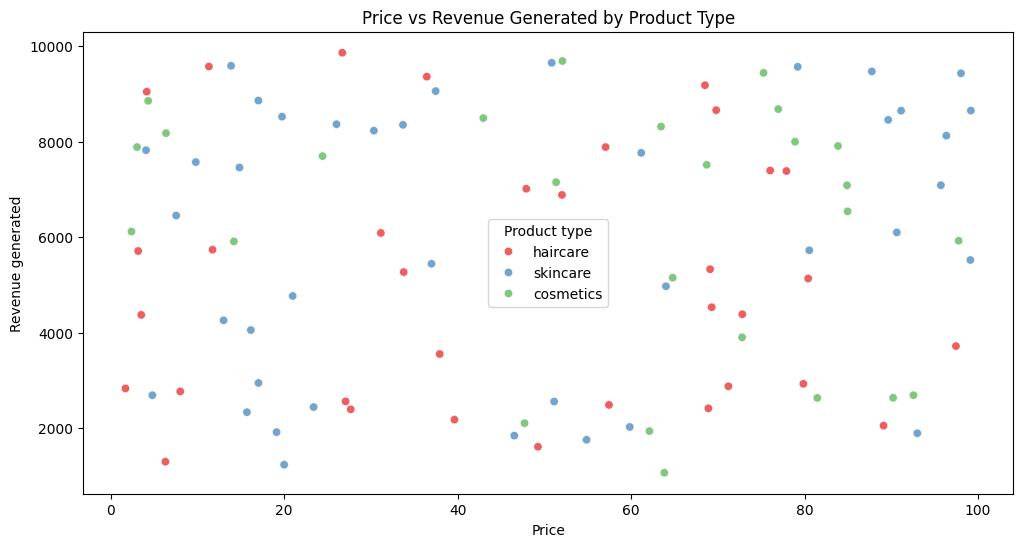

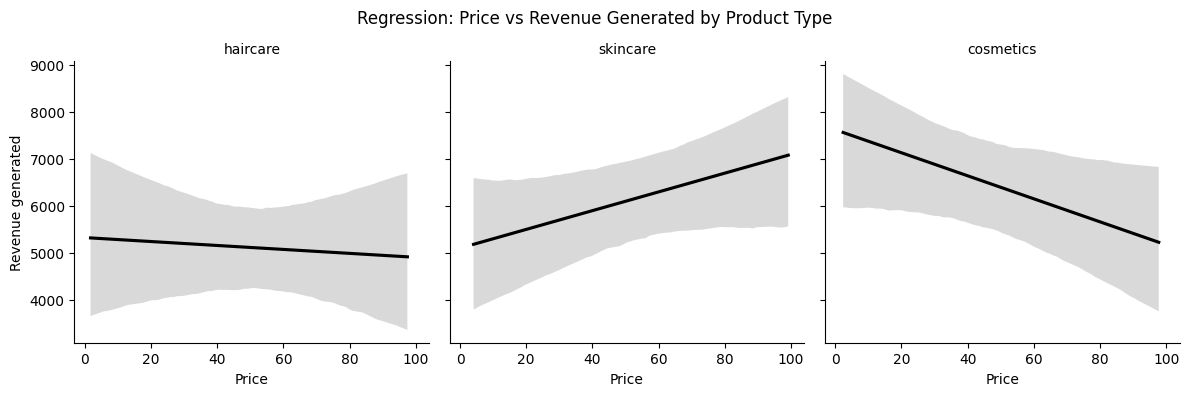

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Price', y='Revenue generated', hue='Product type',
                sizes=(20, 200), legend='full',palette='Set1', alpha=0.7)
plt.title('Price vs Revenue Generated by Product Type')
plt.xlabel('Price')
plt.ylabel('Revenue generated')

g = sns.FacetGrid(data, col='Product type', col_wrap=3, height=4)
g.map_dataframe(sns.regplot, x='Price', y='Revenue generated', scatter=False, color='black')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Regression: Price vs Revenue Generated by Product Type')
plt.show()

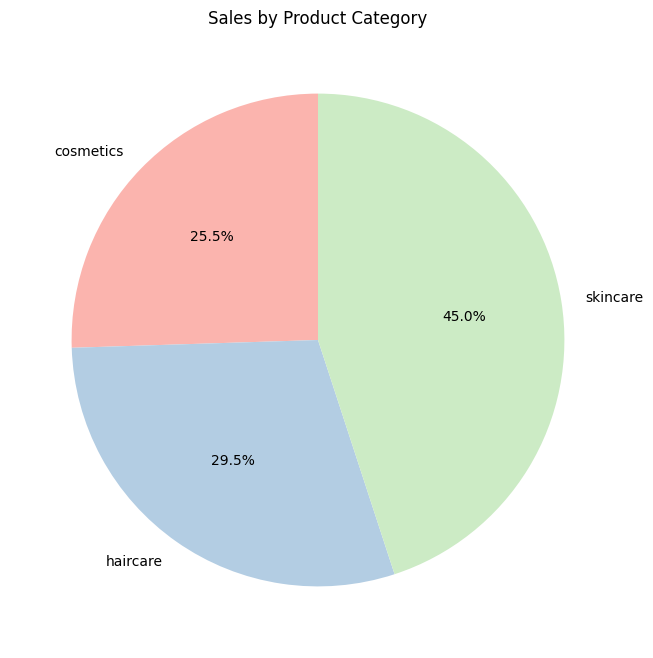

In [116]:
plt.figure(figsize=(8, 8))
grouped_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
plt.pie(grouped_data['Number of products sold'], labels=grouped_data['Product type'], autopct='%1.1f%%', startangle=90,colors=plt.cm.Pastel1.colors)
plt.title('Sales by Product Category')
plt.show()

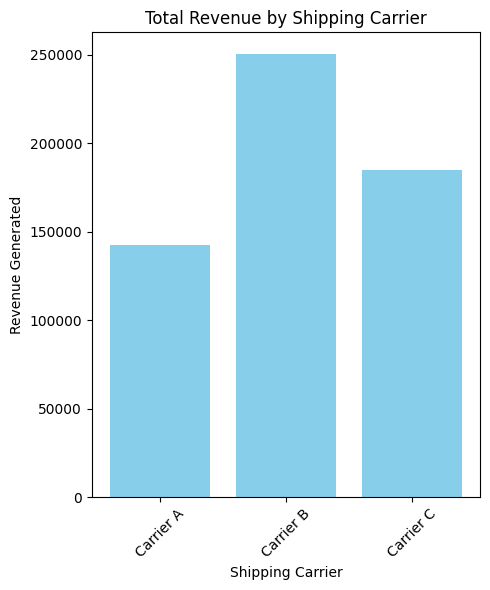

In [63]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(5, 6))
plt.bar(total_revenue['Shipping carriers'], total_revenue['Revenue generated'], color='skyblue')
plt.title('Total Revenue by Shipping Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.692713                    43.052740
1     haircare          18.676780                    48.457993
2     skincare          17.750789                    48.993157


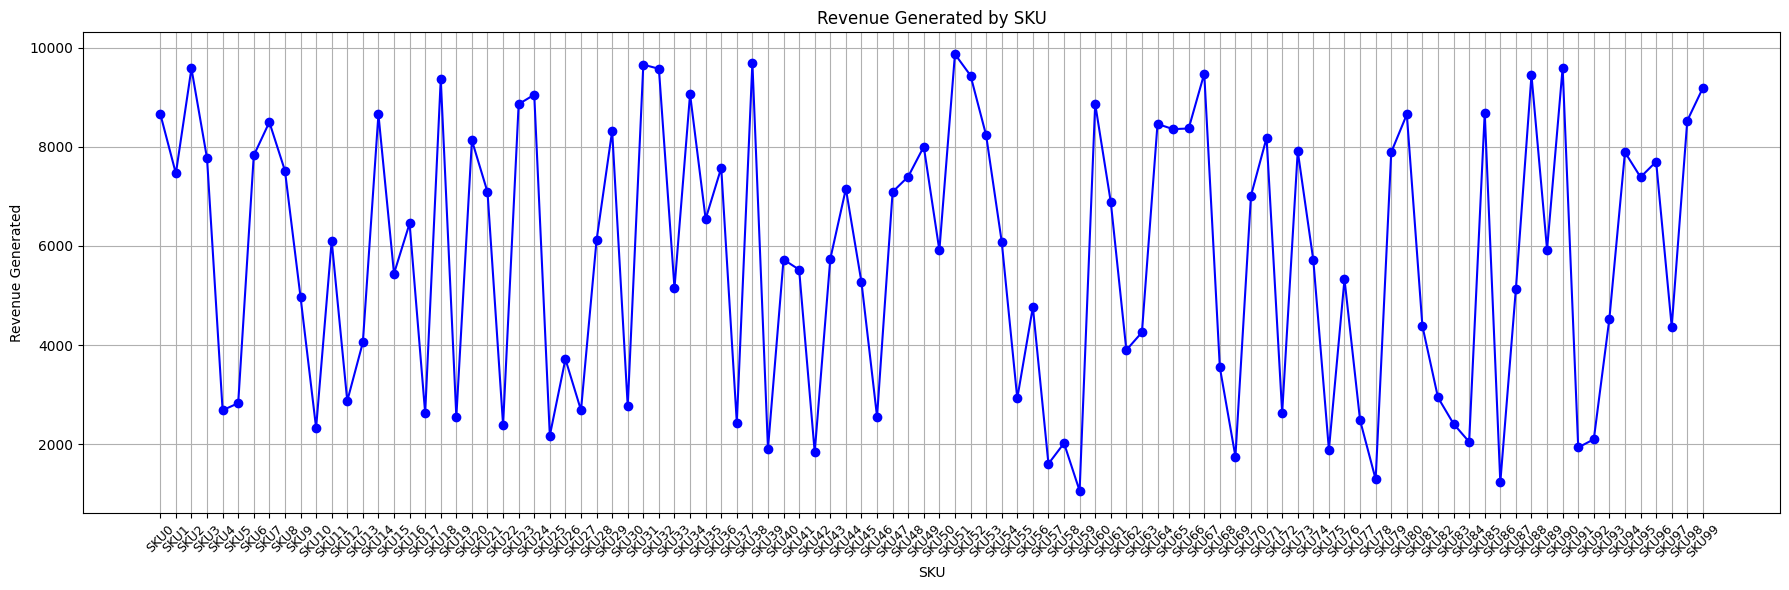

In [82]:
plt.figure(figsize=(18, 6))
plt.plot(data['SKU'], data['Revenue generated'], marker='o', linestyle='-', color='b', label='Revenue generated')

plt.title('Revenue Generated by SKU')
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45,fontsize=9)
plt.grid(True)

plt.tight_layout()
plt.show()


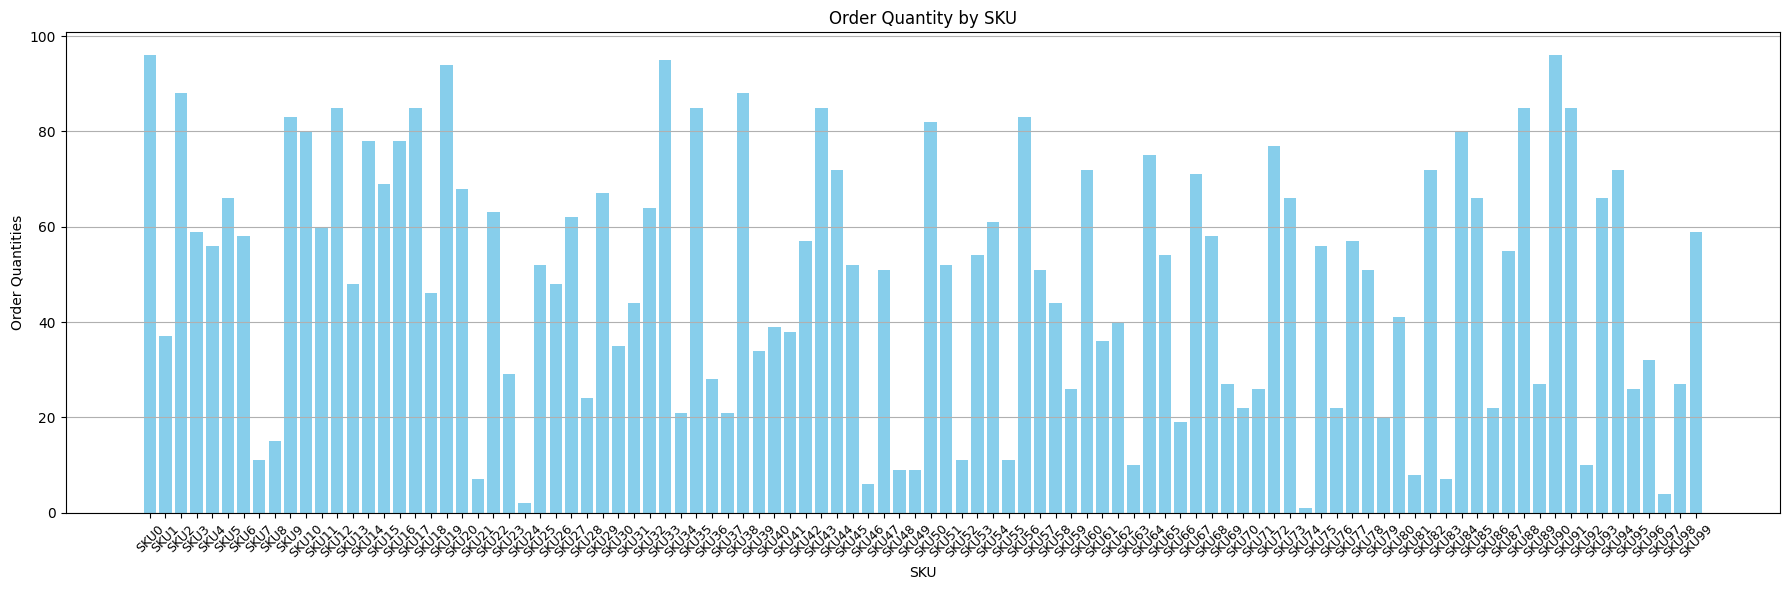

In [81]:
plt.figure(figsize=(18, 6))
plt.bar(data['SKU'], data['Order quantities'], color='skyblue')
plt.title('Order Quantity by SKU')

plt.xlabel('SKU')
plt.ylabel('Order Quantities')
plt.xticks(rotation=45,fontsize=9)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

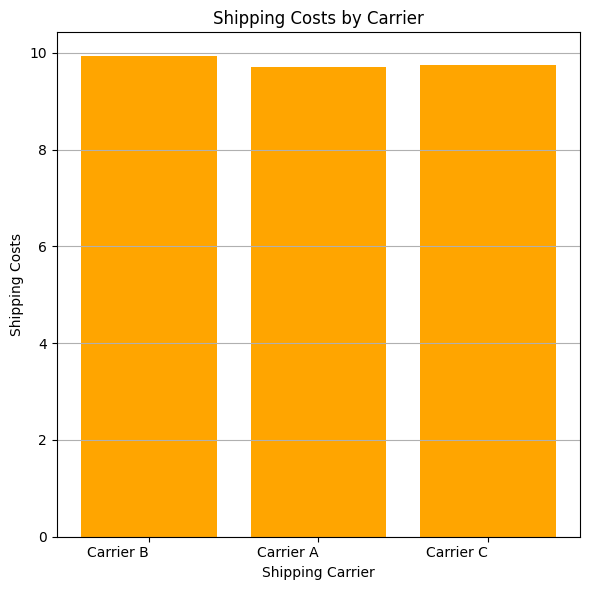

In [92]:
plt.figure(figsize=(6, 6))
plt.bar(data['Shipping carriers'], data['Shipping costs'], color='orange')
plt.title('Shipping Costs by Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

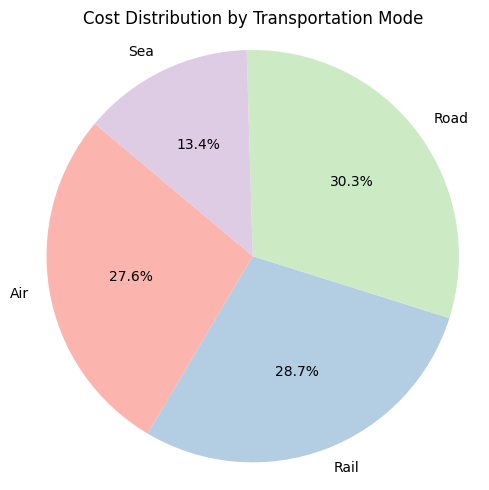

In [115]:
plt.figure(figsize=(5, 5))
t_category = data.groupby('Transportation modes')['Costs'].sum().reset_index()
plt.pie(t_category['Costs'], labels=t_category['Transportation modes'], autopct='%1.1f%%', startangle=140 ,colors=plt.cm.Pastel1.colors)
plt.title('Cost Distribution by Transportation Mode')
plt.axis('equal')  
plt.tight_layout()
plt.show

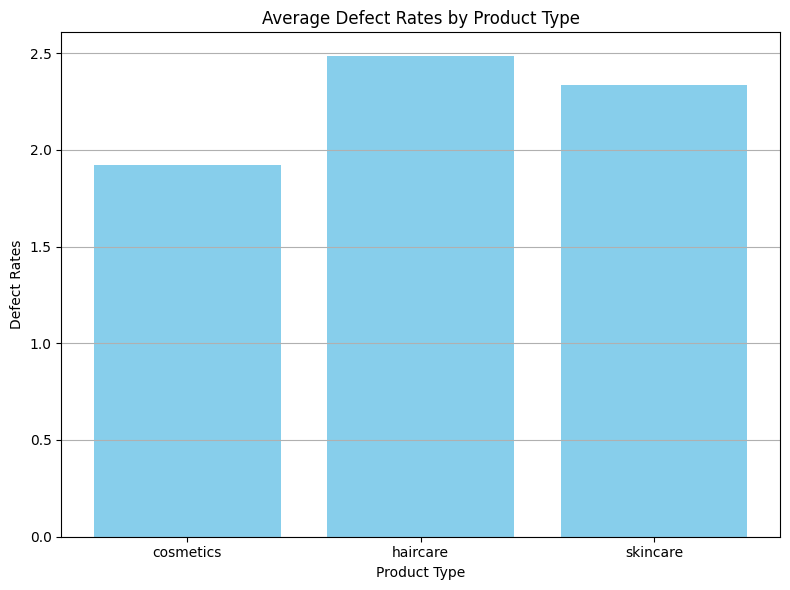

In [107]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(defect_rates_by_product['Product type'], defect_rates_by_product['Defect rates'], color='skyblue')
plt.title('Average Defect Rates by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Defect Rates')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

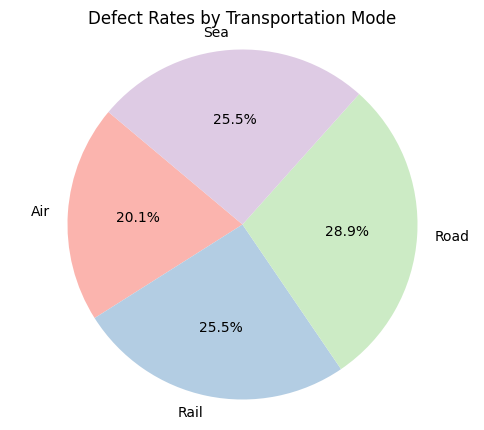

In [114]:

grouped_data = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()
plt.figure(figsize=(6, 5))
plt.pie(grouped_data['Defect rates'], labels=grouped_data['Transportation modes'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Defect Rates by Transportation Mode')
plt.axis('equal')  
plt.show()